<a href="https://colab.research.google.com/github/Shubhamthorat667/react_registration/blob/main/Energy_Consumptio_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')
print(df.head())

   Unnamed: 0      TxnDate   TxnTime  Consumption
0       76229  01 Jan 2022  16:55:52        1.010
1       76258  01 Jan 2022  21:45:29        0.908
2       76287  01 Jan 2022  12:24:52        0.926
3       76316  01 Jan 2022  04:07:36        0.928
4       76345  01 Jan 2022  06:52:25        0.916


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1228 non-null   int64  
 1   TxnDate      1228 non-null   object 
 2   TxnTime      1228 non-null   object 
 3   Consumption  1228 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.5+ KB


In [3]:
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
reference_date = pd.to_datetime('2022-01-01')
df['Days_Since_Reference'] = (df['TxnDate'] - reference_date).dt.days

# Now, 'Days_Since_Reference' is a numeric column (float) representing the number of days.
print(df)

      Unnamed: 0    TxnDate   TxnTime  Consumption  Days_Since_Reference
0          76229 2022-01-01  16:55:52        1.010                     0
1          76258 2022-01-01  21:45:29        0.908                     0
2          76287 2022-01-01  12:24:52        0.926                     0
3          76316 2022-01-01  04:07:36        0.928                     0
4          76345 2022-01-01  06:52:25        0.916                     0
...          ...        ...       ...          ...                   ...
1223       97922 2022-01-20  21:43:55        5.128                    19
1224       97951 2022-01-20  09:43:03        5.924                    19
1225       97980 2022-01-20  03:06:05        4.664                    19
1226       98009 2022-01-20  06:16:38        3.474                    19
1227       98038 2022-01-20  16:48:03        2.478                    19

[1228 rows x 5 columns]


In [4]:
df['TxnTime'] = pd.to_datetime(df['TxnTime'])

# Extract hours, minutes, and seconds
df['Hour'] = df['TxnTime'].dt.hour
df['Minute'] = df['TxnTime'].dt.minute
df['Second'] = df['TxnTime'].dt.second

# Convert time values to a float representation, e.g., fractional hours since midnight
df['Time_Float'] = df['Hour'] + df['Minute'] / 60.0 + df['Second'] / 3600.0
df.drop(['Hour', 'Minute', 'Second'], axis=1, inplace=True)

print(df)

<ipython-input-4-48844b905d1f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TxnTime'] = pd.to_datetime(df['TxnTime'])


      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2024-04-11 16:55:52        1.010   
1          76258 2022-01-01 2024-04-11 21:45:29        0.908   
2          76287 2022-01-01 2024-04-11 12:24:52        0.926   
3          76316 2022-01-01 2024-04-11 04:07:36        0.928   
4          76345 2022-01-01 2024-04-11 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2024-04-11 21:43:55        5.128   
1224       97951 2022-01-20 2024-04-11 09:43:03        5.924   
1225       97980 2022-01-20 2024-04-11 03:06:05        4.664   
1226       98009 2022-01-20 2024-04-11 06:16:38        3.474   
1227       98038 2022-01-20 2024-04-11 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# to fix the above error we have created 2 new features "Days_Since_Reference and Time_Float"
features = df[['Unnamed: 0','Days_Since_Reference','Time_Float','Consumption']]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
pca = PCA(n_components=2)  # Choose the number of components you want to keep
principal_components = pca.fit_transform(scaled_features)

# Step 7: Interpret Results
explained_variance = pca.explained_variance_ratio_
print (df)

      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2024-04-11 16:55:52        1.010   
1          76258 2022-01-01 2024-04-11 21:45:29        0.908   
2          76287 2022-01-01 2024-04-11 12:24:52        0.926   
3          76316 2022-01-01 2024-04-11 04:07:36        0.928   
4          76345 2022-01-01 2024-04-11 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2024-04-11 21:43:55        5.128   
1224       97951 2022-01-20 2024-04-11 09:43:03        5.924   
1225       97980 2022-01-20 2024-04-11 03:06:05        4.664   
1226       98009 2022-01-20 2024-04-11 06:16:38        3.474   
1227       98038 2022-01-20 2024-04-11 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

In [7]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41457699 0.34903876]


In [8]:
component_loadings = pca.components_
print(component_loadings)

[[ 0.71094897  0.69979326  0.01089034  0.06871941]
 [ 0.03211484 -0.11313399  0.694555    0.70976242]]


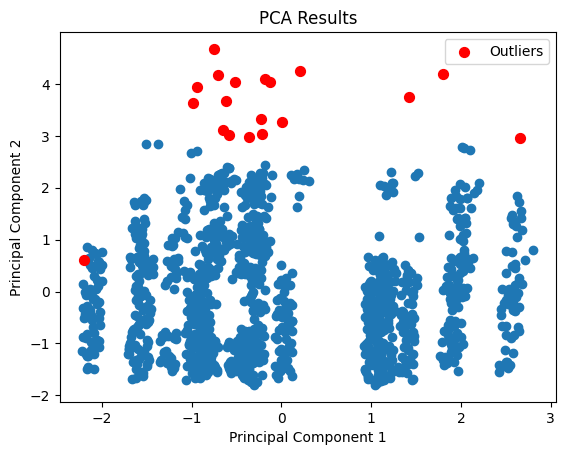

In [9]:
import matplotlib.pyplot as plt
from scipy import stats

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
z_scores = np.abs(stats.zscore(principal_components))
threshold = 2.5

outliers = np.where(z_scores > threshold)
outlier_indices = list(set(outliers[0]) | set(outliers[1]))  # Combine row and column outliers

# Highlight outliers on the scatterplot
plt.scatter(principal_components[outlier_indices, 0], principal_components[outlier_indices, 1], c='red', s=50, label='Outliers')
plt.legend()
plt.show()

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have already applied PCA as shown in your code and have 'principal_components'
# Also, make sure 'df' contains your original data before PCA.

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Unnamed: 0', 'Days_Since_Reference', 'Time_Float', 'Consumption']])

# Create a PCA object with the number of components you used originally
n_components = 2  # Replace with the number of components you used
pca = PCA(n_components=n_components)

# Fit the PCA model on the scaled data
pca.fit(scaled_features)

# Reconstruct the data points from the PCA components
reconstructed_data = pca.inverse_transform(principal_components)

# Create a DataFrame with the reconstructed data
reconstructed_df = pd.DataFrame(data=reconstructed_data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

# Concatenate the 'Unnamed: 0' column if you want it in the reconstructed DataFrame
reconstructed_df['Unnamed: 0'] = df['Unnamed: 0']

# Display the reconstructed DataFrame
print(reconstructed_df)

      Feature1  Feature2  Feature3  Feature4  Unnamed: 0
0    -1.563279 -1.561054  0.083007 -0.042210       76229
1    -1.542076 -1.607265  0.404988  0.287333       76258
2    -1.579883 -1.509476 -0.242937 -0.375416       76287
3    -1.613437 -1.422352 -0.819583 -0.965245       76316
4    -1.599428 -1.448086 -0.629855 -0.770939       76345
...        ...       ...       ...       ...         ...
1223  1.946051  1.742615  0.858879  1.032217       97922
1224  1.912436  1.860660  0.133673  0.291126       97951
1225  1.860546  1.942169 -0.502876 -0.361181       97980
1226  1.852532  1.922779 -0.447850 -0.305806       98009
1227  1.880311  1.826388  0.145891  0.300961       98038

[1228 rows x 5 columns]


In [11]:
from scipy import stats

# Calculate z-scores for the reconstructed data
z_scores_reconstructed = np.abs(stats.zscore(reconstructed_data))
threshold = 2.5  # Set your desired threshold for anomaly detection

# Find outlier indices based on the threshold
outliers_reconstructed = np.where(z_scores_reconstructed > threshold)
outlier_indices_reconstructed = list(set(outliers_reconstructed[0]) | set(outliers_reconstructed[1]))  # Combine row and column outliers

# Display the indices of anomalies in the reconstructed data
print("Anomaly Indices in Reconstructed Data:", outlier_indices_reconstructed)

Anomaly Indices in Reconstructed Data: [193, 2, 3, 1030, 651, 1169, 82, 84, 89, 799, 1056, 290, 312, 423, 359, 489, 364, 240, 242, 311, 568]


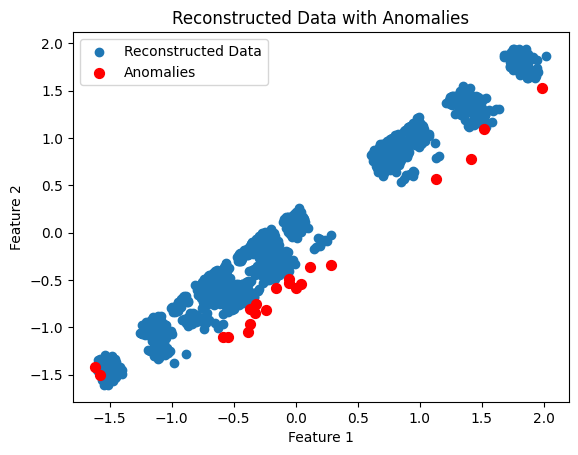

In [12]:
import matplotlib.pyplot as plt

# Scatterplot of the reconstructed data
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

# Highlight anomalies in red
plt.scatter(reconstructed_data[outlier_indices_reconstructed, 0], reconstructed_data[outlier_indices_reconstructed, 1], c='red', s=50, label='Anomalies')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Reconstructed Data with Anomalies')
plt.legend()
plt.show()

In [13]:
import pandas as pd

# Load the time-series data into a DataFrame
df = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
# For example, you can fill missing values with a specific value or interpolate them
# Combine 'TxnDate' and 'TxnTime' into a single timestamp column
df['timestamp'] = pd.to_datetime(df['TxnDate'] + ' ' + df['TxnTime'])

# Drop the individual 'TxnDate' and 'TxnTime' columns if they are no longer needed
df.drop(['TxnDate', 'TxnTime'], axis=1, inplace=True)

# Verify the changes
print(df.head())



   Unnamed: 0      TxnDate   TxnTime  Consumption
0       76229  01 Jan 2022  16:55:52        1.010
1       76258  01 Jan 2022  21:45:29        0.908
2       76287  01 Jan 2022  12:24:52        0.926
3       76316  01 Jan 2022  04:07:36        0.928
4       76345  01 Jan 2022  06:52:25        0.916
Unnamed: 0     0
TxnDate        0
TxnTime        0
Consumption    0
dtype: int64
   Unnamed: 0  Consumption           timestamp
0       76229        1.010 2022-01-01 16:55:52
1       76258        0.908 2022-01-01 21:45:29
2       76287        0.926 2022-01-01 12:24:52
3       76316        0.928 2022-01-01 04:07:36
4       76345        0.916 2022-01-01 06:52:25


In [14]:
# Convert 'timestamp' column to datetime dtype
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Verify the changes
print(df.head())
print(df.info())


                     Unnamed: 0  Consumption
timestamp                                   
2022-01-01 16:55:52       76229        1.010
2022-01-01 21:45:29       76258        0.908
2022-01-01 12:24:52       76287        0.926
2022-01-01 04:07:36       76316        0.928
2022-01-01 06:52:25       76345        0.916
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2022-01-01 16:55:52 to 2022-01-20 16:48:03
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1228 non-null   int64  
 1   Consumption  1228 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 28.8 KB
None


Anomaly Indices in Reconstructed Data: [193, 2, 3, 1030, 651, 1169, 82, 84, 89, 799, 1056, 290, 312, 423, 359, 489, 364, 240, 242, 311, 568]


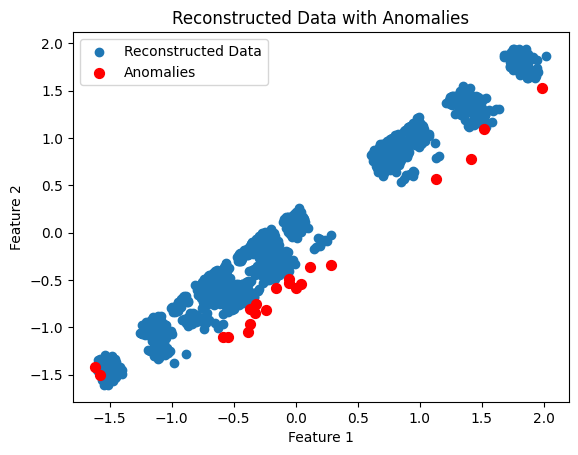

In [15]:
from scipy import stats

# Calculate z-scores for the reconstructed data
z_scores_reconstructed = np.abs(stats.zscore(reconstructed_data))
threshold = 2.5  # Set your desired threshold for anomaly detection

# Find outlier indices based on the threshold
outliers_reconstructed = np.where(z_scores_reconstructed > threshold)
outlier_indices_reconstructed = list(set(outliers_reconstructed[0]) | set(outliers_reconstructed[1]))  # Combine row and column outliers

# Display the indices of anomalies in the reconstructed data
print("Anomaly Indices in Reconstructed Data:", outlier_indices_reconstructed)

# Scatterplot of the reconstructed data
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

# Highlight anomalies in red
plt.scatter(reconstructed_data[outlier_indices_reconstructed, 0], reconstructed_data[outlier_indices_reconstructed, 1], c='red', s=50, label='Anomalies')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Reconstructed Data with Anomalies')
plt.legend()
plt.show()


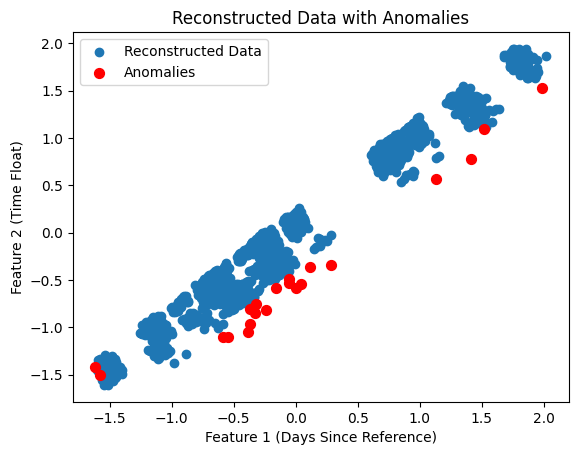

In [16]:
# Scatterplot of the reconstructed data
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

# Highlight anomalies in red
plt.scatter(reconstructed_data[outlier_indices_reconstructed, 0], reconstructed_data[outlier_indices_reconstructed, 1], c='red', s=50, label='Anomalies')

plt.xlabel('Feature 1 (Days Since Reference)')
plt.ylabel('Feature 2 (Time Float)')
plt.title('Reconstructed Data with Anomalies')
plt.legend()
plt.show()


In [17]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the unnamed column is the first one
# You can assign it a name like 'DeviceID' using the rename function
df = df.rename(columns={df.columns[0]: 'DeviceID'})

# Display the updated DataFrame
print(df)


                     DeviceID  Consumption
timestamp                                 
2022-01-01 16:55:52     76229        1.010
2022-01-01 21:45:29     76258        0.908
2022-01-01 12:24:52     76287        0.926
2022-01-01 04:07:36     76316        0.928
2022-01-01 06:52:25     76345        0.916
...                       ...          ...
2022-01-20 21:43:55     97922        5.128
2022-01-20 09:43:03     97951        5.924
2022-01-20 03:06:05     97980        4.664
2022-01-20 06:16:38     98009        3.474
2022-01-20 16:48:03     98038        2.478

[1228 rows x 2 columns]


In [22]:
# import matplotlib.pyplot as plt

# # Compute the maximum usage of each device
# max_usages = df.groupby('DeviceID')['Consumption'].max()

# # Plot maximum usage of each device
# for device_id, max_usage in max_usages.items():
#     device_data = df[df['DeviceID'] == device_id]
#     if max_usage == max_energy:
#         plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}', color='red', marker='^')
#     else:
#         plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}', color='blue')

# # Set minimum and maximum energy usage marklines for the entire dataset
# min_energy = df['Consumption'].min()
# max_energy = df['Consumption'].max()
# plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage (All Devices)')
# plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage (All Devices)')

# # Label axes and add legend
# plt.xlabel('Timestamp')
# plt.ylabel('Energy Consumption')
# plt.title('Maximum Energy Consumption of Each Device Over Time')
# plt.legend()

# # Show plot
# plt.show()


Blue devices: 73596, 73625, 73654, 73683, 73712, 73741, 73770, 73799, 73828, 73857, 73886, 73915, 73944, 73973, 74002, 74031, 74060, 74089, 74118, 74147, 74176, 74205, 74234, 74263, 74292, 74321, 74350, 74379, 74408, 74437, 74466, 74495, 74524, 74535, 74564, 74593, 74640, 74669, 74698, 74727, 74756, 74785, 74814, 74843, 74872, 74901, 74930, 74959, 74988, 75017, 75046, 75075, 75104, 75133, 75162, 75191, 75220, 75249, 75278, 75307, 75336, 75365, 76229, 76258, 76287, 76316, 76345, 76374, 76403, 76432, 76461, 76490, 76512, 76548, 76577, 76606, 76635, 76664, 76693, 76722, 76751, 76780, 76809, 76838, 76867, 76896, 76925, 76954, 76983, 77012, 77041, 77070, 77099, 77128, 77143, 77157, 77172, 77186, 77201, 77215, 77233, 77244, 77273, 77283, 77289, 77302, 77312, 77317, 77331, 77341, 77346, 77347, 77360, 77375, 77376, 77389, 77404, 77405, 77418, 77433, 77434, 77447, 77462, 77463, 77476, 77492, 77505, 77520, 77521, 77534, 77549, 77550, 77563, 77578, 77592, 77621, 77629, 77650, 77665, 77679, 77687,

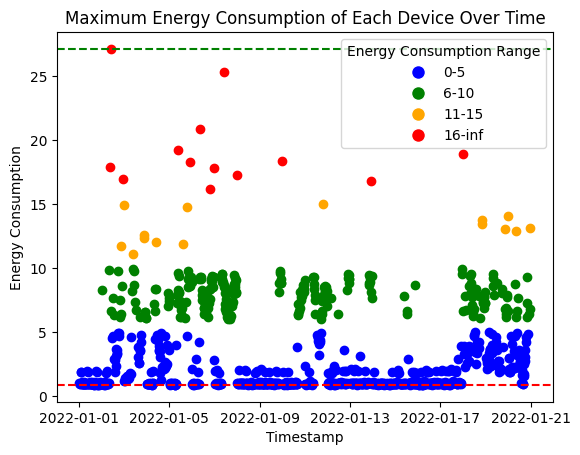

In [23]:
import matplotlib.pyplot as plt

# Define color ranges for different energy consumption levels
color_ranges = {
    (0, 5): 'blue',
    (6, 10): 'green',
    (11, 15): 'orange',
    (16, float('inf')): 'red'
}

# Compute the maximum usage of each device
max_usages = df.groupby('DeviceID')['Consumption'].max()

# Group device IDs by their corresponding color
device_ids_by_color = {color: [] for color in color_ranges.values()}

# Group device IDs by their maximum usage
for device_id, max_usage in max_usages.items():
    for (start, end), color in color_ranges.items():
        if start <= max_usage < end:
            device_ids_by_color[color].append(device_id)
            break

# Print device IDs by color
for color, device_ids in device_ids_by_color.items():
    print(f'{color.capitalize()} devices: {", ".join(str(device_id) for device_id in device_ids)}')

# Plot maximum usage of each device
for device_id, max_usage in max_usages.items():
    device_data = df[df['DeviceID'] == device_id]
    for (start, end), color in color_ranges.items():
        if start <= max_usage < end:
            plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}', color=color)
            break  # Stop once the color range is found

# Set minimum and maximum energy usage marklines for the entire dataset
min_energy = df['Consumption'].min()
max_energy = df['Consumption'].max()
plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage (All Devices)')
plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage (All Devices)')

# Add legend with color labels
handles = []
for (start, end), color in color_ranges.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{start}-{end}'))
plt.legend(handles=handles, title='Energy Consumption Range')

# Label axes
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Maximum Energy Consumption of Each Device Over Time')

# Show plot
plt.show()


SelectionSlider(continuous_update=False, description='Device ID:', options=(76229, 76258, 76287, 76316, 76345,…

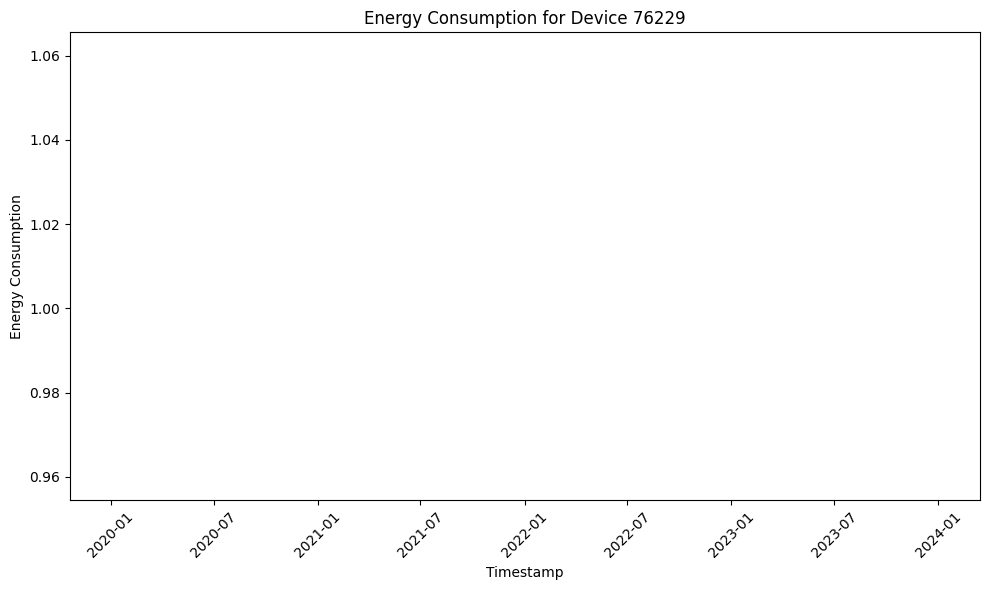

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame containing the energy consumption data

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Function to update the plot based on selected device ID
def update_plot(device_id):
    ax.clear()  # Clear previous plot
    device_data = df[df['DeviceID'] == device_id]
    ax.plot(device_data.index, device_data['Consumption'])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Energy Consumption')
    ax.set_title(f'Energy Consumption for Device {device_id}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Get unique device IDs
device_ids = df['DeviceID'].unique()

# Create a slider widget
device_slider = widgets.SelectionSlider(
    options=device_ids,
    value=device_ids[0],
    description='Device ID:',
    continuous_update=False
)

# Connect the slider widget to the update_plot function
widgets.interactive(update_plot, device_id=device_slider)

# Display the slider
display(device_slider)

# Show the initial plot
update_plot(device_ids[0])


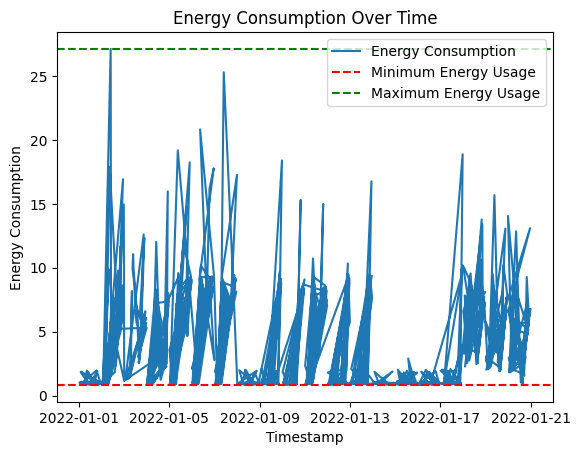

In [25]:
import matplotlib.pyplot as plt

# Plot energy consumption
plt.plot(df.index, df['Consumption'], label='Energy Consumption')

# Set minimum and maximum energy usage marklines
min_energy = df['Consumption'].min()
max_energy = df['Consumption'].max()
plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage')
plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage')

# Label axes and add legend
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.legend()

# Show plot
plt.show()


**LSTM Based model**

Epoch 1/50
28/28 [==============================] - 4s 27ms/step - loss: 0.0228 - val_loss: 0.0049
Epoch 2/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0195 - val_loss: 0.0039
Epoch 3/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0183 - val_loss: 0.0018
Epoch 4/50
28/28 [==============================] - 0s 11ms/step - loss: 0.0180 - val_loss: 0.0011
Epoch 5/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0177 - val_loss: 6.9126e-04
Epoch 6/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0175 - val_loss: 5.4206e-04
Epoch 7/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0175 - val_loss: 4.6022e-04
Epoch 8/50
28/28 [==============================] - 0s 11ms/step - loss: 0.0174 - val_loss: 4.0785e-04
Epoch 9/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0174 - val_loss: 3.6598e-04
Epoch 10/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0174 - val_lo

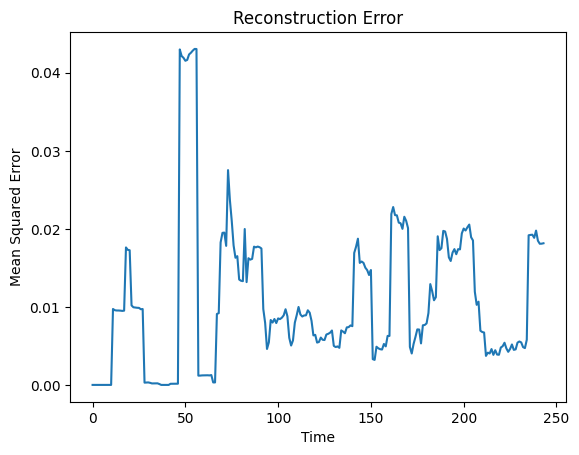

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming df is your DataFrame containing the energy consumption data

# Preprocessing: scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Consumption'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length for LSTM
sequence_length = 10

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Predict on the test set
predicted_values = model.predict(X_test)

# Reshape predicted_values to match the shape of X_test
predicted_values_reshaped = np.expand_dims(predicted_values, axis=-1)

# Calculate reconstruction error
mse = np.mean(np.power(X_test - predicted_values_reshaped, 2), axis=1)

# Plot the reconstruction error
plt.plot(mse)
plt.xlabel('Time')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error')
plt.show()


Epoch 1/50
28/28 [==============================] - 4s 39ms/step - loss: 0.0230 - val_loss: 0.0051
Epoch 2/50
28/28 [==============================] - 1s 20ms/step - loss: 0.0194 - val_loss: 0.0039
Epoch 3/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0184 - val_loss: 0.0019
Epoch 4/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0181 - val_loss: 0.0011
Epoch 5/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0176 - val_loss: 5.1890e-04
Epoch 6/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0174 - val_loss: 3.0376e-04
Epoch 7/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0174 - val_loss: 2.6644e-04
Epoch 8/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0174 - val_loss: 2.3432e-04
Epoch 9/50
28/28 [==============================] - 0s 11ms/step - loss: 0.0173 - val_loss: 2.0078e-04
Epoch 10/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0172 - val_lo

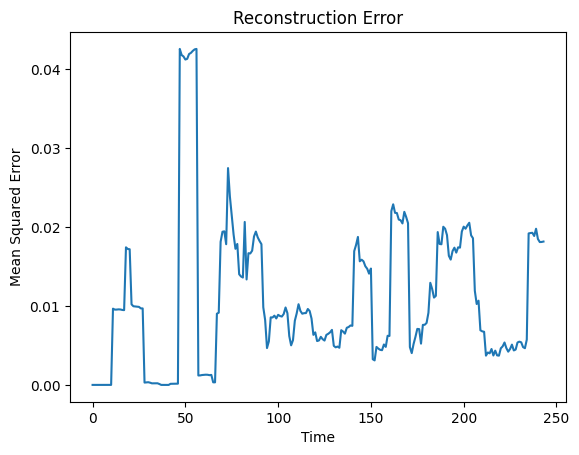

Reconstruction Error: 0.01815914198140579


In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the energy consumption data

# Preprocessing: scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Consumption'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length for LSTM
sequence_length = 10

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Predict on the test set
predicted_values = model.predict(X_test)

# Reshape predicted_values to match the shape of X_test
predicted_values_reshaped = np.expand_dims(predicted_values, axis=-1)

# Calculate reconstruction error
mse = np.mean(np.power(X_test - predicted_values_reshaped, 2), axis=1)

# Plot the reconstruction error
plt.plot(mse)
plt.xlabel('Time')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error')
plt.show()

# Print reconstruction error value with unit
print("Reconstruction Error:", mse[-1][0])



In [29]:
# Assume model is the trained LSTM model and X_test, y_test are the test data
# Make predictions on the test data
predicted_values = model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import mean_squared_error

# Flatten the predicted and actual values for comparison
predicted_values_flat = predicted_values.flatten()
y_test_flat = y_test.flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_flat, predicted_values_flat)

# Calculate Accuracy
accuracy = 1 - mse
print("Accuracy:", accuracy)


8/8 [==============================] - 0s 4ms/step
Accuracy: 0.9875015529592956


In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector

# Sample input data (you can replace this with your manual input)
# Assuming each input sequence has 10 time steps and 3 features
input_data = np.random.rand(1, 10, 3)

# Define the LSTM autoencoder model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(10, 3), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(10),  # Repeat the output vector 10 times
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    Dense(3)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Load the pre-trained weights (if available)
# model.load_weights('autoencoder_weights.h5')

# Predict using the input data
predicted_values = model.predict(input_data)

# Print the predicted values
print("Predicted Values:")
print(predicted_values)


1/1 [==============================] - 1s 1s/step
Predicted Values:
[[[ 0.0001438   0.00028364 -0.00032945]
  [ 0.00034493  0.00065797 -0.00072616]
  [ 0.00054589  0.00102696 -0.00108083]
  [ 0.00072203  0.00134306 -0.0013513 ]
  [ 0.00088049  0.00159194 -0.00153348]
  [ 0.00103668  0.00177716 -0.00163646]
  [ 0.00119766  0.00190441 -0.00167373]
  [ 0.00137417  0.0019797  -0.00167006]
  [ 0.00155951  0.00201442 -0.00163704]
  [ 0.00174615  0.00201738 -0.00158385]]]


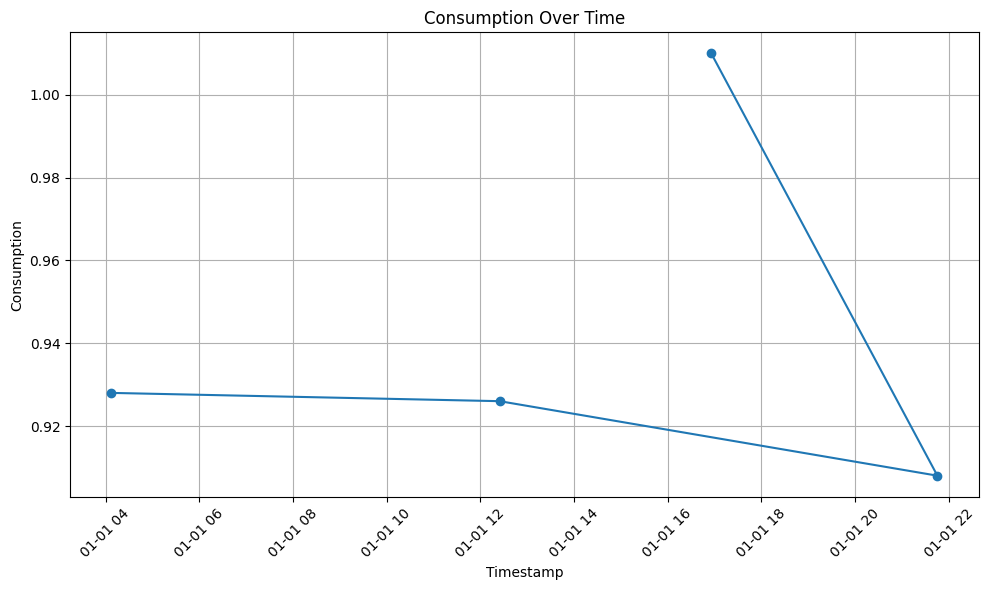

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'TxnDate': ['01 Jan 2022', '01 Jan 2022', '01 Jan 2022', '01 Jan 2022'],
    'TxnTime': ['16:55:52', '21:45:29', '12:24:52', '04:07:36'],
    'Consumption': [1.01, 0.908, 0.926, 0.928]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine 'TxnDate' and 'TxnTime' into a single datetime column
df['Timestamp'] = pd.to_datetime(df['TxnDate'] + ' ' + df['TxnTime'])

# Plot consumption values over time
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Consumption'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.title('Consumption Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-36-ddfba6d18514>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TxnTime'] = pd.to_datetime(df['TxnTime'])


8/8 [==============================] - 0s 2ms/step


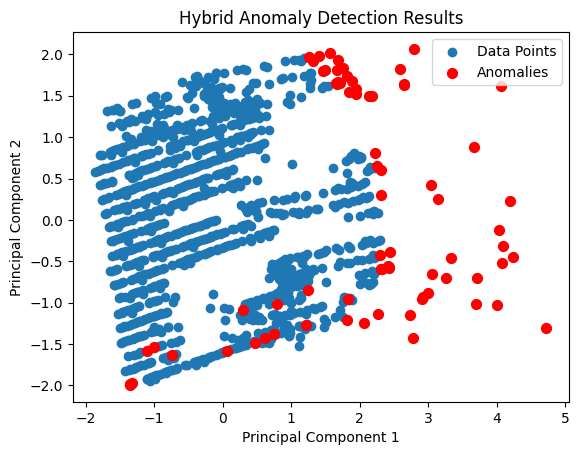

Number of anomalies detected by PCA: 62
Number of anomalies detected by Autoencoder: 13
Number of anomalies detected by Hybrid Model: 75


In [36]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')

# Preprocess the data
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
reference_date = pd.to_datetime('2022-01-01')
df['Days_Since_Reference'] = (df['TxnDate'] - reference_date).dt.days
df['TxnTime'] = pd.to_datetime(df['TxnTime'])
df['Hour'] = df['TxnTime'].dt.hour
df['Minute'] = df['TxnTime'].dt.minute
df['Second'] = df['TxnTime'].dt.second
df['Time_Float'] = df['Hour'] + df['Minute'] / 60.0 + df['Second'] / 3600.0
df.drop(['Hour', 'Minute', 'Second'], axis=1, inplace=True)

# Select features for anomaly detection
features = df[['Days_Since_Reference', 'Time_Float', 'Consumption']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 1. Unsupervised Anomaly Detection using PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Calculate the Mahalanobis distance
mahalanobis_distance = np.sum(np.square(principal_components), axis=1)

# Define a threshold for anomaly detection
mahalanobis_threshold = np.percentile(mahalanobis_distance, 95)  # Adjust percentile as needed

# Detect outliers based on the threshold
outliers_pca = np.where(mahalanobis_distance > mahalanobis_threshold)[0]

# 2. Supervised Anomaly Detection using Autoencoder

# Split the data into train and test sets
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

# Define and train the autoencoder model
model = Sequential([
    Dense(32, activation='relu', input_shape=(scaled_features.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(scaled_features.shape[1])
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=50, batch_size=32, verbose=0)

# Predict reconstruction errors for test set
reconstructions = model.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - reconstructions), axis=1)

# Define a threshold for anomaly detection
reconstruction_threshold = np.percentile(reconstruction_errors, 95)  # Adjust percentile as needed

# Detect outliers based on the threshold
outliers_autoencoder = np.where(reconstruction_errors > reconstruction_threshold)[0]

# 3. Combine Results

# Combine outliers detected by both methods
combined_outliers = np.union1d(outliers_pca, outliers_autoencoder)

# Visualize anomalies
import matplotlib.pyplot as plt

plt.scatter(principal_components[:, 0], principal_components[:, 1], label='Data Points')
plt.scatter(principal_components[combined_outliers, 0], principal_components[combined_outliers, 1], c='red', s=50, label='Anomalies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hybrid Anomaly Detection Results')
plt.legend()
plt.show()

# Evaluate performance
print("Number of anomalies detected by PCA:", len(outliers_pca))
print("Number of anomalies detected by Autoencoder:", len(outliers_autoencoder))
print("Number of anomalies detected by Hybrid Model:", len(combined_outliers))


In [38]:
# Assuming you have the hybrid model 'model' and the dataset 'scaled_features'

# 1. Calculate anomaly scores using the hybrid model
reconstructions = model.predict(scaled_features)
reconstruction_errors = np.mean(np.square(scaled_features - reconstructions), axis=1)

# 2. Choose a threshold
threshold = np.percentile(reconstruction_errors, 95)  # Example threshold, adjust as needed

# 3. Classify data points as anomalies or normal based on the threshold
predicted_labels = reconstruction_errors > threshold

# 4. Calculate precision, recall, and F1 score
true_positives = np.sum(predicted_labels)
false_positives = len(predicted_labels) - true_positives

precision = true_positives / (true_positives + false_positives)
recall = true_positives / len(scaled_features)  # Since we don't have ground truth, use total number of data points as denominator
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


39/39 [==============================] - 0s 4ms/step
Precision: 0.050488599348534204
Recall: 0.050488599348534204
F1 Score: 0.050488599348534204


In [ ]:
# 1. Load and preprocess the dataset as you did before

# 2. Unsupervised Anomaly Detection (PCA-based)

# Apply PCA and calculate principal components as you did before
# Detect outliers using a threshold on the Mahalanobis distance or z-scores

# 3. Supervised Anomaly Detection (Autoencoder)

# Train an autoencoder neural network on the dataset
# Use reconstruction error as an indicator of anomalies

# 4. Combine Results

# Define a threshold for the reconstruction error from the autoencoder
# Combine the results from both methods using a voting scheme or logical rules
# For example, if a data point is flagged as an anomaly by both methods, classify it as an anomaly

# Alternatively, you can use a weighted approach where you assign weights to the anomalies detected by each method based on their confidence levels

# Finally, visualize the anomalies and evaluate the performance of your hybrid model


In [ ]:
import pandas as pd
import numpy as np

# Assuming your data is stored in a DataFrame named 'df'
# Convert 'TxnDate' and 'TxnTime' to datetime if they are not already
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
df['TxnTime'] = pd.to_datetime(df['TxnTime'])

# Calculate z-scores for 'Consumption'
df['Consumption_ZScore'] = (df['Consumption'] - df['Consumption'].mean()) / df['Consumption'].std()

# Define threshold for anomalies
threshold = 3

# Detect anomalies
anomalies = df[(df['Consumption_ZScore'] > threshold) | (df['Consumption_ZScore'] < -threshold)]

# Print anomalies
print(anomalies)


In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/KwhConsumptionBlower78_3.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Now, apply the anomaly detection code
import numpy as np

# Convert 'TxnDate' and 'TxnTime' to datetime if they are not already
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
df['TxnTime'] = pd.to_datetime(df['TxnTime'])

# Calculate z-scores for 'Consumption'
df['Consumption_ZScore'] = (df['Consumption'] - df['Consumption'].mean()) / df['Consumption'].std()

# Define threshold for anomalies
threshold = 3

# Detect anomalies
anomalies = df[(df['Consumption_ZScore'] > threshold) | (df['Consumption_ZScore'] < -threshold)]

# Print anomalies
print(anomalies)


   Unnamed: 0      TxnDate   TxnTime  Consumption
0           0  01 Feb 2022  14:41:48        1.016
1           1  01 Feb 2022  17:28:44        0.928
2           2  01 Feb 2022  19:51:07        0.988
3           3  01 Feb 2022  07:26:39        1.126
4           4  01 Feb 2022  05:20:47        0.886


<ipython-input-41-106cbb122ad5>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TxnTime'] = pd.to_datetime(df['TxnTime'])


      Unnamed: 0    TxnDate             TxnTime  Consumption  \
382          382 2022-02-06 2024-04-11 08:49:24        9.422   
456          456 2022-02-08 2024-04-11 09:21:07        8.036   
461          461 2022-02-08 2024-04-11 11:04:09        9.054   
466          466 2022-02-08 2024-04-11 08:40:10        8.722   
486          486 2022-02-08 2024-04-11 08:59:56        8.872   
586          586 2022-02-10 2024-04-11 11:34:27       15.456   
588          588 2022-02-10 2024-04-11 08:46:09        9.112   
616          616 2022-02-10 2024-04-11 09:27:36        8.056   
617          617 2022-02-10 2024-04-11 08:25:35        9.708   
640          640 2022-02-10 2024-04-11 09:08:03        8.692   
652          652 2022-02-11 2024-04-11 07:55:40        8.144   
690          690 2022-02-11 2024-04-11 20:02:16       11.244   
700          700 2022-02-11 2024-04-11 08:41:11       15.416   
770          770 2022-02-13 2024-04-11 08:30:46       15.106   
776          776 2022-02-13 2024-04-11 1

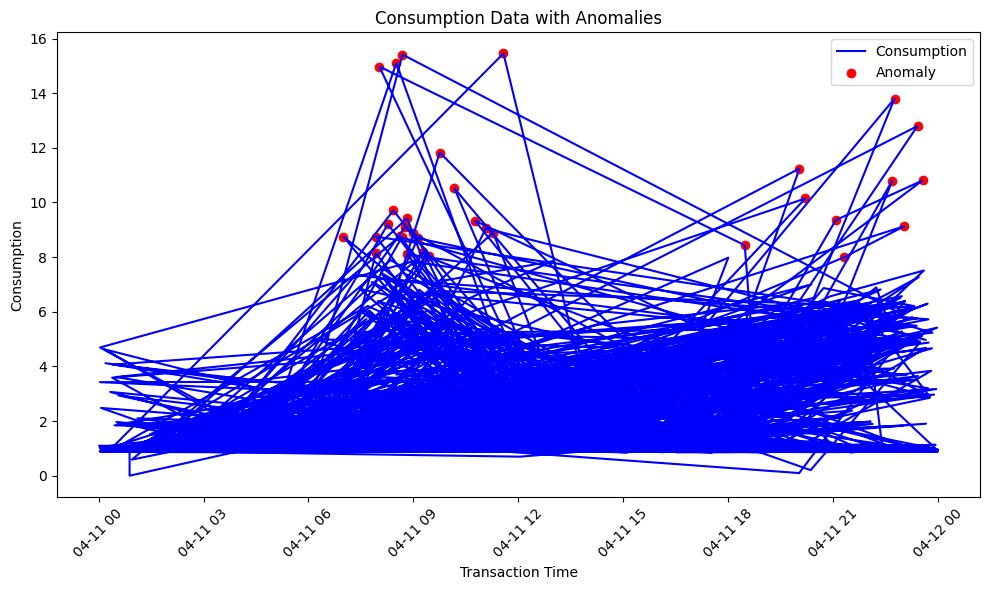

In [42]:
import matplotlib.pyplot as plt

# Plot the consumption data
plt.figure(figsize=(10, 6))
plt.plot(df['TxnTime'], df['Consumption'], color='blue', label='Consumption')

# Mark anomalies
anomalies = df[df['Consumption_ZScore'].abs() > 3]
plt.scatter(anomalies['TxnTime'], anomalies['Consumption'], color='red', label='Anomaly')

# Add labels and legend
plt.title('Consumption Data with Anomalies')
plt.xlabel('Transaction Time')
plt.ylabel('Consumption')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [43]:
# 1. Calculate the total number of anomalies
total_anomalies = len(anomalies)

# 2. Calculate the average consumption of anomalies
average_anomaly_consumption = anomalies['Consumption'].mean()

# 3. Compare the distribution of anomaly consumption values with the overall distribution
overall_consumption_mean = df['Consumption'].mean()
overall_consumption_std = df['Consumption'].std()
anomaly_consumption_mean = anomalies['Consumption'].mean()
anomaly_consumption_std = anomalies['Consumption'].std()

# Print the statistics
print("Total number of anomalies:", total_anomalies)
print("Average consumption of anomalies:", average_anomaly_consumption)
print("Overall consumption mean:", overall_consumption_mean)
print("Overall consumption standard deviation:", overall_consumption_std)
print("Anomaly consumption mean:", anomaly_consumption_mean)
print("Anomaly consumption standard deviation:", anomaly_consumption_std)


Total number of anomalies: 34
Average consumption of anomalies: 10.165823529411764
Overall consumption mean: 2.0113352402745996
Overall consumption standard deviation: 1.9921379011074345
Anomaly consumption mean: 10.165823529411764
Anomaly consumption standard deviation: 2.316048953669423


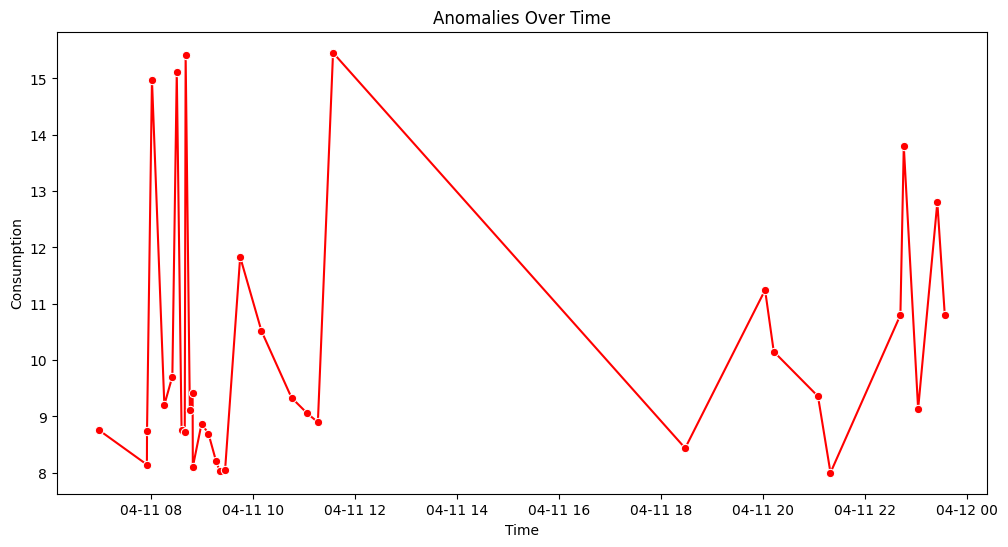

In [49]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Temporal Patterns
# Plot anomalies against time
plt.figure(figsize=(12, 6))
sns.lineplot(x='TxnTime', y='Consumption', data=df[df['Consumption_ZScore'] > threshold], marker='o', color='red')
plt.title('Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()

# Feature Engineering
# Incorporate additional features like weather data, holidays, or special events
# Example:
# df['Weather'] = get_weather_data(df['TxnDate'])
# df['IsHoliday'] = df['TxnDate'].apply(check_holiday)

# Clustering Analysis
# Use clustering techniques to group similar anomalies together
# Example:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3)
# df['Cluster'] = kmeans.fit_predict(df[['Feature1', 'Feature2', ...]])

# Root Cause Analysis
# Investigate potential root causes of anomalies
# Example:
# df_anomalies = df[df['Consumption_ZScore'] > threshold]
# anomaly_times = df_anomalies['TxnTime']
# potential_causes = df[df['TxnTime'].isin(anomaly_times)]

# Predictive Modeling
# Develop predictive models to forecast future anomalies
# Example:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# predicted_anomalies = model.predict(X_test)

# Further analysis can be performed based on the specific requirements and domain knowledge of the dataset.



In [50]:
# Total number of anomalies
total_anomalies = len(df[df['Consumption_ZScore'] > threshold])

# Average consumption of anomalies
anomaly_consumption_mean = df[df['Consumption_ZScore'] > threshold]['Consumption'].mean()

# Overall consumption mean and standard deviation
overall_consumption_mean = df['Consumption'].mean()
overall_consumption_std = df['Consumption'].std()

# Anomaly consumption mean and standard deviation
anomaly_consumption_std = df[df['Consumption_ZScore'] > threshold]['Consumption'].std()

print("Total number of anomalies:", total_anomalies)
print("Average consumption of anomalies:", anomaly_consumption_mean)
print("Overall consumption mean:", overall_consumption_mean)
print("Overall consumption standard deviation:", overall_consumption_std)
print("Anomaly consumption mean:", anomaly_consumption_mean)
print("Anomaly consumption standard deviation:", anomaly_consumption_std)


Total number of anomalies: 34
Average consumption of anomalies: 10.165823529411764
Overall consumption mean: 2.0113352402745996
Overall consumption standard deviation: 1.9921379011074345
Anomaly consumption mean: 10.165823529411764
Anomaly consumption standard deviation: 2.316048953669423


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/KwhConsumptionBlower78_3.csv")

# Assuming you have already detected anomalies and stored them in a column named 'Anomaly'
# Extract features and target variable
X = df.drop(columns=['Anomaly', 'Unnamed: 0', 'TxnDate', 'TxnTime'])
y = df['Anomaly']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape the data if necessary
if X_train.ndim == 3:
    X_train = X_train.reshape(-1, X_train.shape[2])

if y_train.ndim == 3:
    y_train = y_train.reshape(-1, y_train.shape[2])

# Initialize and fit the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
predicted_anomalies = model.predict(X_test)


KeyError: "['Anomaly'] not found in axis"